# Support Vector Machines
* An SVM classifier finds the line (in 2D) or hyperplane (in higher dimensions) that best separates two classes.
* Unlike just any line, it chooses the one that **maximizes the margin**: the distance between the boundary and the closest points from each class.
* The **points that lie closest** and “hold up” this margin are the **support vectors**.

> Intuition: SVM wants the widest street that separates the two groups of points.

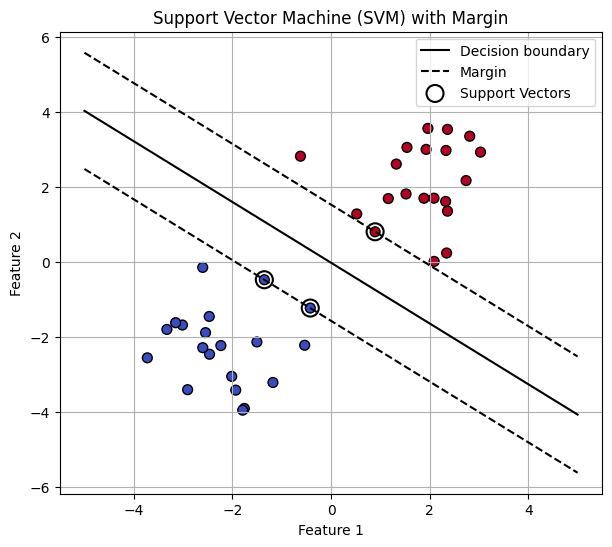

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate synthetic data
np.random.seed(42)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [0]*20 + [1]*20

# Train linear SVM
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]
xx = np.linspace(-5, 5)
yy = -(w[0]/w[1]) * xx - b/w[1]

# Plot the margin lines
margin = 1 / np.sqrt(np.sum(w**2))
yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
yy_up = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin

# Plot data and decision boundary
plt.figure(figsize=(7,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors="k")
plt.plot(xx, yy, 'k-', label="Decision boundary")
plt.plot(xx, yy_down, 'k--', label="Margin")
plt.plot(xx, yy_up, 'k--')

# Highlight support vectors
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
            s=150, facecolors='none', edgecolors='k', linewidths=1.5, label="Support Vectors")

plt.legend()
plt.title("Support Vector Machine (SVM) with Margin")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()